# Problem Definition

### 1.1. Define the problem statement
- **In the current medical landscape, doctors often face the challenge of making treatment decisions based on a vast amount of patient data, including medical history, symptoms, lab results, and other relevant factors. This can lead to variability in treatment outcomes and potential delays in identifying the best course of action for individual patients.**

### 1.2. Determine project goals and objectives

- **Develop an intelligent medical decision support system.**
  
- **Analyze patient data to assist doctors in making informed decisions about the best treatment options for individual patients.**
  
- **Leverage machine learning and data analysis to provide personalized treatment recommendations.**


### 1.3 About the Data

The dataset is **Electronic Health Record Predicting** collected from a private hospital in Indonesia. It contains the patient's laboratory test results used to determine the next patient treatment, whether in care or out care.

### Attribute Information

The table below provides the attribute name, attribute type, the measurement unit, and a brief description:

| **Name**      | **Data Type**     | **Value Sample** | **Description**                                        |
|---------------|-------------------|------------------|--------------------------------------------------------|
| HAEMATOCRIT   | Continuous        | 35.1             | Patient laboratory test result of haematocrit           |
| HAEMOGLOBINS  | Continuous        | 11.8             | Patient laboratory test result of haemoglobins          |
| ERYTHROCYTE   | Continuous        | 4.65             | Patient laboratory test result of erythrocyte           |
| LEUCOCYTE     | Continuous        | 6.3              | Patient laboratory test result of leucocyte             |
| THROMBOCYTE   | Continuous        | 310              | Patient laboratory test result of thrombocyte           |
| MCH           | Continuous        | 25.4             | Patient laboratory test result of MCH                   |
| MCHC          | Continuous        | 33.6             | Patient laboratory test result of MCHC                  |
| MCV           | Continuous        | 75.5             | Patient laboratory test result of MCV                   |
| AGE           | Continuous        | 12               | Patient age                                             |
| SEX           | Nominal – Binary  | F                | Patient gender                                          |
| SOURCE        | Nominal           | {in,out}            | The class target: 1 = in care patient, 0 = out care patient |


# Data Collection



In [30]:
## Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split  ## Splitting the dataset
from sklearn.linear_model import LogisticRegression  ## Logistic Regression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  ## Evaluation metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler  ## Scaling the dataset
from sklearn.model_selection import train_test_split  ## Splitting the dataset
from sklearn.svm import SVC ### Support Vector Machine
from sklearn.neighbors import KNeighborsClassifier  ## KNN
from sklearn.tree import DecisionTreeClassifier  ## Decision Tree
from sklearn.ensemble import RandomForestClassifier  ## Random Forest
from sklearn.ensemble import AdaBoostClassifier  ## AdaBoost
from sklearn.ensemble import GradientBoostingClassifier  ## Gradient Boosting
from xgboost import XGBClassifier  ## XGboost

from hyperopt import fmin, tpe, hp, STATUS_OK, Trials  ## Hyperparameter tuning

import warnings  ## To ignore warnings
warnings.filterwarnings('ignore')

import joblib ## Save the final model


In [31]:
## Loading dataset

df = pd.read_csv('PATIENT DATASET.csv')
df.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,out
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,out
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,F,out
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,F,out
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,M,out


# 2. Understanding the data

In [32]:
df.shape  # Shape of dataset (rows, columns)

(4412, 11)

In [33]:
df.columns # Getting Column names

Index(['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE',
       'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE', 'SEX', 'SOURCE'],
      dtype='object')

In [34]:
df.info() # Information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4412 entries, 0 to 4411
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   4412 non-null   float64
 1   HAEMOGLOBINS  4412 non-null   float64
 2   ERYTHROCYTE   4412 non-null   float64
 3   LEUCOCYTE     4412 non-null   float64
 4   THROMBOCYTE   4412 non-null   int64  
 5   MCH           4412 non-null   float64
 6   MCHC          4412 non-null   float64
 7   MCV           4412 non-null   float64
 8   AGE           4412 non-null   int64  
 9   SEX           4412 non-null   object 
 10  SOURCE        4412 non-null   object 
dtypes: float64(7), int64(2), object(2)
memory usage: 379.3+ KB


# 3. Data Cleaning

In [35]:
## Handling missing values

df.isnull().sum()  # No null values present in our dataset

,0
HAEMATOCRIT,0
HAEMOGLOBINS,0
ERYTHROCYTE,0
LEUCOCYTE,0
THROMBOCYTE,0
MCH,0
MCHC,0
MCV,0
AGE,0
SEX,0


In [36]:
## Handling duplicate values

df.duplicated().sum() # No duplicate values present in our dataset

0

# 4. Exploratory Data Analysis (EDA)

### 4.1. Descriptive statistics

In [37]:
df.describe() # Descriptive statistics of dataset

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE
count,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000
mean,38.197688,12.741727,4.541260,8.718608,257.524479,28.234701,33.343042,84.612942,46.626473
std,5.974784,2.079903,0.784091,5.049041,113.972365,2.672639,1.228664,6.859101,21.731218
min,13.700000,3.800000,1.480000,1.100000,8.000000,14.900000,26.000000,54.000000,1.000000
25%,34.375000,11.400000,4.040000,5.675000,188.000000,27.200000,32.700000,81.500000,29.000000
50%,38.600000,12.900000,4.570000,7.600000,256.000000,28.700000,33.400000,85.400000,47.000000
75%,42.500000,14.200000,5.050000,10.300000,321.000000,29.800000,34.100000,88.700000,64.000000
max,69.000000,18.900000,7.860000,76.600000,1183.000000,40.800000,39.000000,115.600000,99.000000


### 4.2. Data visualization

In [38]:
df.head() # Top 5 rows

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,out
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,out
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,F,out
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,F,out
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,M,out


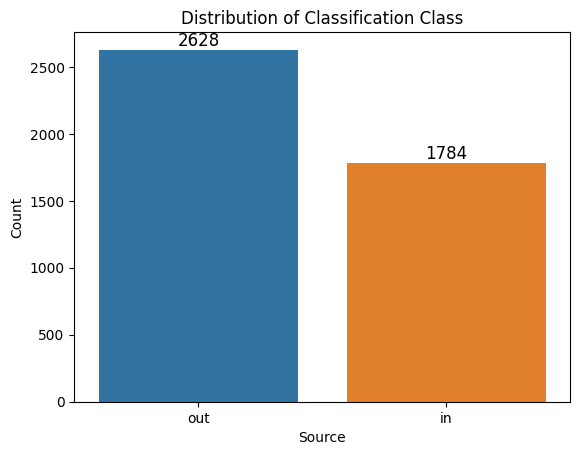

In [39]:
plt.title('Distribution of Classification Class')
sns.countplot(x='SOURCE', data=df, hue = 'SOURCE')  ## Distribution of classification class
plt.xlabel('Source')
plt.ylabel('Count')

ax = plt.gca() # Get the current axes
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')

plt.show()

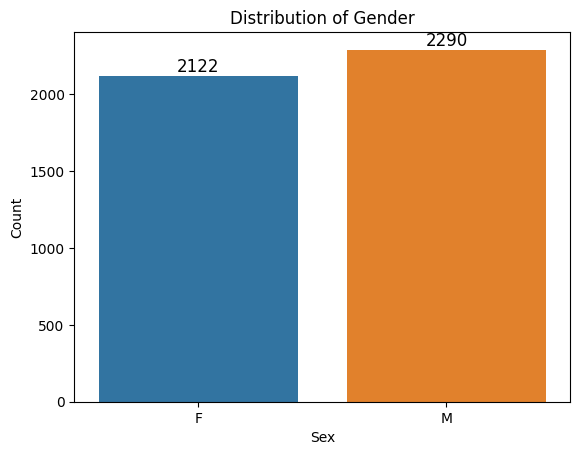

In [40]:
sns.countplot(x='SEX', data=df, hue = 'SEX')  ## Distribution of Gender
plt.title('Distribution of Gender')
plt.xlabel('Sex')
plt.ylabel('Count')

ax = plt.gca() # Get the current axes
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

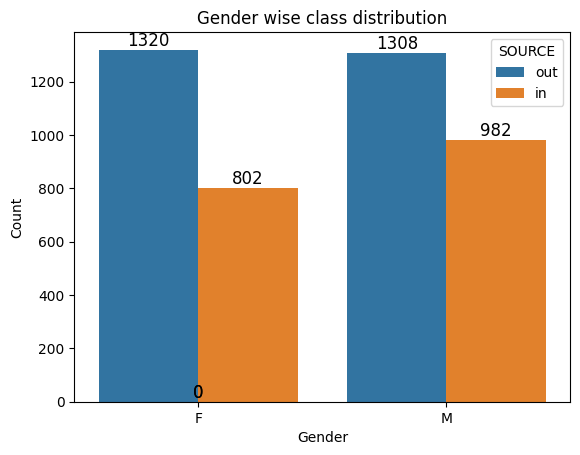

In [41]:
sns.countplot(x='SEX', data=df, hue = 'SOURCE')  ## Gender wise class distribution
plt.title('Gender wise class distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

ax = plt.gca() # Get the current axes
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')

plt.show()

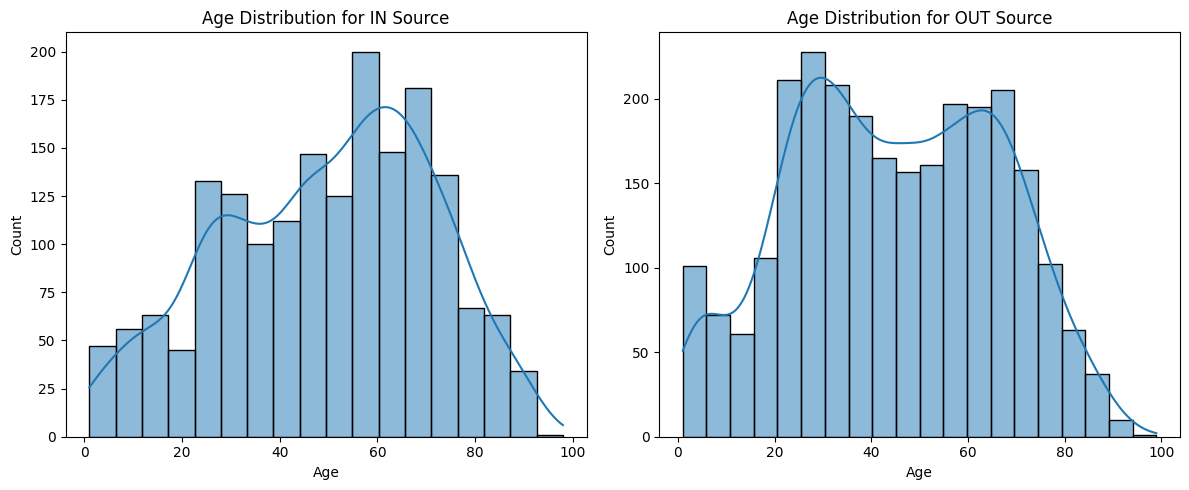

In [42]:
# Filter data for IN and OUT sources
in_data = df[df['SOURCE'] == 'in']
out_data = df[df['SOURCE'] == 'out']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot for IN source
sns.histplot(x='AGE', data=in_data, ax=axes[0], kde = True)
axes[0].set_title('Age Distribution for IN Source')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

# Plot for OUT source
sns.histplot(x='AGE', data=out_data, ax=axes[1], kde = True)
axes[1].set_title('Age Distribution for OUT Source')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Count')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

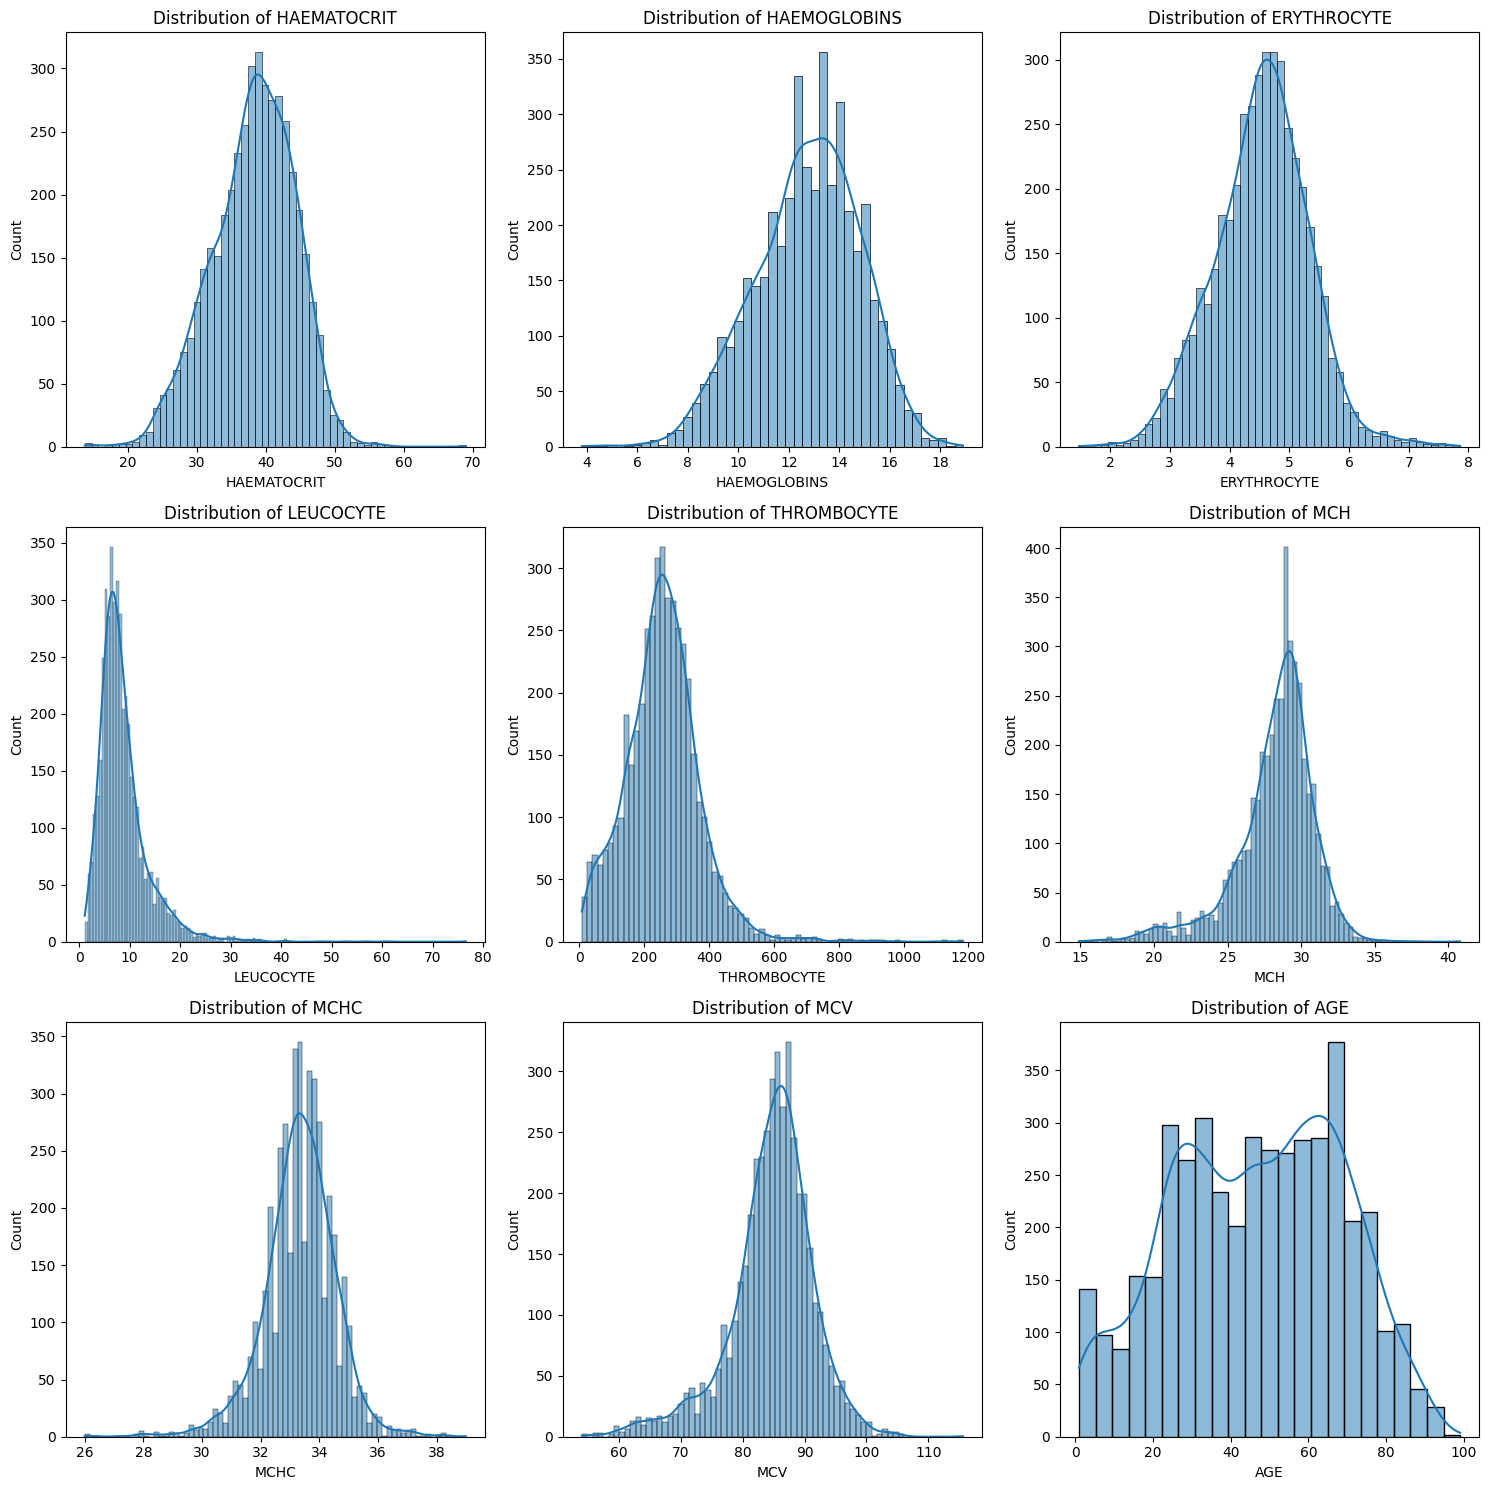

In [43]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_plots = len(num_cols)
rows = (num_plots + 2) // 3  # Calculate rows for 3x3 grid
cols = min(num_plots, 3)


fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()  # Flatten the axes array for easy iteration


for i, col in enumerate(num_cols):
    if i < num_plots:
        sns.histplot(df[col], ax=axes[i], kde=True)
        axes[i].set_title(f'Distribution of {col}')

    else:
        axes[i].set_axis_off()

plt.tight_layout()
plt.show()


### Feature Engineering

In [44]:
df['THROMBOCYTE_LEUCOCYTE_RATIO'] = df['THROMBOCYTE'] / (df['LEUCOCYTE'] + 1e-6)  ## Feature Engineering


In [45]:
## separateing numeric columns for scaling

num_col = df.select_dtypes(include=['int64', 'float64'])
numeric_cols = num_col.columns
numeric_cols

Index(['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE',
       'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE',
       'THROMBOCYTE_LEUCOCYTE_RATIO'],
      dtype='object')

### Encoding

In [46]:
## Encoding

df['SEX'] = df['SEX'].map({'M': 1, 'F': 0})
df["SOURCE"] = df["SOURCE"].map({'in': 1, 'out': 0})
df.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE,THROMBOCYTE_LEUCOCYTE_RATIO
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,0,0,49.206341
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,0,0,26.299211
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,0,0,23.106059
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,0,0,34.857140
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,1,0,15.067873


### Correlation analysis

In [47]:
df.corr()['SOURCE'] * 100

,SOURCE
HAEMATOCRIT,-27.118986
HAEMOGLOBINS,-25.579300
ERYTHROCYTE,-23.200126
LEUCOCYTE,13.735876
THROMBOCYTE,-24.320250
MCH,-1.330837
MCHC,1.771137
MCV,-2.252439
AGE,10.953339
SEX,5.179527


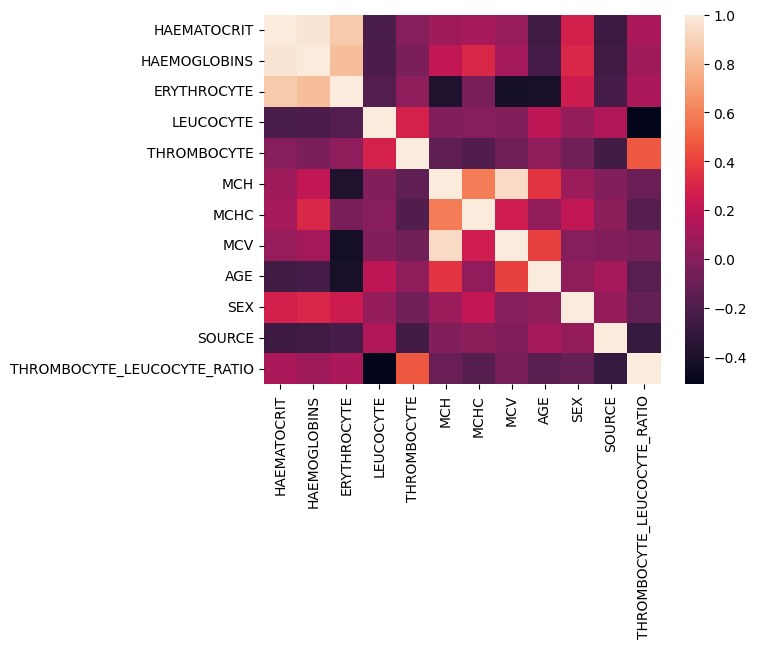

In [48]:
## Correlation analysis
corr = df.corr()
sns.heatmap(corr) ## Heatmap of corrleation
plt.show()

# Splitting the dataset

In [20]:
X = df.drop('SOURCE', axis = 1)  ## Independent variable
y = df['SOURCE']  ## Dependent variable

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  ## Splitting the dataset

### Scaling the data

In [22]:
scaler = RobustScaler()  ## Scaling the dataset

numeric_cols  ## Numeric columns

X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])  ## Fitting the scaler on training data and transforming it
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])  ## Transforming the test data using the same scaler

# Model Selection

In [49]:
def model_comparision(X_train, X_test, y_train, y_test):
  models = {
      'Logistic Regression': LogisticRegression(),
      'SVM': SVC(),
      'KNN': KNeighborsClassifier(),
      'Random Forest': RandomForestClassifier(),
      'AdaBoost': AdaBoostClassifier(),
      'Gradient Boosting': GradientBoostingClassifier(),
      'XGBoost': XGBClassifier()
  }

  results = []

  for name, model in models.items():
      model.fit(X_train, y_train)
      y_pred_train = model.predict(X_train)
      y_pred_test = model.predict(X_test)

      train_accuracy = accuracy_score(y_train, y_pred_train)
      test_accuracy = accuracy_score(y_test, y_pred_test)

      results.append([name, train_accuracy, test_accuracy])

  df_results = pd.DataFrame(results, columns=['Model', 'Train Accuracy', 'Test Accuracy'])
  return df_results.sort_values(by='Test Accuracy', ascending=False)

model_comparision(X_train, X_test, y_train, y_test)

,Model,Train Accuracy,Test Accuracy
3,Random Forest,1.000000,0.761042
6,XGBoost,0.993199,0.751982
5,Gradient Boosting,0.800227,0.738392
1,SVM,0.770757,0.736127
2,KNN,0.801360,0.725934
4,AdaBoost,0.735903,0.723669
0,Logistic Regression,0.724568,0.718007


# Hyperparameter Tuning Top 3 model

### Random Forest hyperparamter

In [ ]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'max_depth': int(params['max_depth']),
        'min_samples_split': int(params['min_samples_split']),
        'min_samples_leaf': int(params['min_samples_leaf']),
        'max_features': params['max_features']
    }

    model = RandomForestClassifier(**params)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    #print(f"Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}, Best Params: {params}")
    return {'loss': -test_accuracy, 'status': STATUS_OK}

space = {
    'n_estimators': hp.quniform('n_estimators', 50, 300, 20),
    'max_depth': hp.quniform('max_depth', 3, 20, 1),
    'min_samples_split': hp.quniform('min_samples_split', 10, 50, 5),
    'min_samples_leaf': hp.quniform('min_samples_leaf', 5, 20, 1),
    'max_features': hp.uniform('max_features', 0.5, 1)
}

trials = Trials()
best_rf = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)

print("Best hyperparameters:", best_rf)

best_model_rf = RandomForestClassifier(n_estimators=int(best_rf['n_estimators']),
                                       max_depth=int(best_rf['max_depth']),
                                       min_samples_split=int(best_rf['min_samples_split']),
                                       min_samples_leaf=int(best_rf['min_samples_leaf']),
                                       max_features=best_rf['max_features'])

best_model_rf.fit(X_train, y_train)
y_pred_train = best_model_rf.predict(X_train)
y_pred_test = best_model_rf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")


100%|██████████| 100/100 [05:33<00:00,  3.33s/trial, best loss: -0.7633069082672707]
Best hyperparameters: {'max_depth': 20.0, 'max_features': 0.579819405903499, 'min_samples_leaf': 5.0, 'min_samples_split': 10.0, 'n_estimators': 300.0}
Train Accuracy: 0.9037, Test Accuracy: 0.7441


### Gradient Boosting hyperparameter

In [ ]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'max_depth': int(params['max_depth']),
        'learning_rate': params['learning_rate'],
        'subsample': params['subsample'],
        'min_samples_split': int(params['min_samples_split']),
        'min_samples_leaf': int(params['min_samples_leaf']),
        'max_features': params['max_features']
    }

    model = GradientBoostingClassifier(**params)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    #print(f"Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}, Best Params: {params}")
    return {'loss': -test_accuracy, 'status': STATUS_OK}

space = {
    'n_estimators': hp.quniform('n_estimators', 50, 300, 20),
    'max_depth': hp.quniform('max_depth', 3, 10, 1),
    'learning_rate': hp.loguniform('learning_rate', -5, 0),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'min_samples_split': hp.quniform('min_samples_split', 2, 20, 1),
    'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 20, 1),
    'max_features': hp.uniform('max_features', 0.5, 1)
}

trials = Trials()
best_gb = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)

print("Best hyperparameters:", best_gb)

best_model_gb = GradientBoostingClassifier(n_estimators=int(best_gb['n_estimators']),
                                           max_depth=int(best_gb['max_depth']),
                                           learning_rate=best_gb['learning_rate'],
                                           subsample=best_gb['subsample'],
                                           min_samples_split=int(best_gb['min_samples_split']),
                                           min_samples_leaf=int(best_gb['min_samples_leaf']),
                                           max_features=best_gb['max_features'])

best_model_gb.fit(X_train, y_train)
y_pred_train = best_model_gb.predict(X_train)
y_pred_test = best_model_gb.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

100%|██████████| 100/100 [05:49<00:00,  3.49s/trial, best loss: -0.7746319365798414]
Best hyperparameters: {'learning_rate': 0.4278282878537163, 'max_depth': 9.0, 'max_features': 0.5764856463597089, 'min_samples_leaf': 2.0, 'min_samples_split': 12.0, 'n_estimators': 300.0, 'subsample': 0.8886626677052862}
Train Accuracy: 1.0000, Test Accuracy: 0.7690


### XGboost hyperparameter

In [24]:
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'max_depth': int(params['max_depth']),
        'learning_rate': params['learning_rate'],
        'subsample': params['subsample'],
        'gamma': params['gamma'],
        'min_child_weight': int(params['min_child_weight']),
        'colsample_bytree': params['colsample_bytree']
    }

    model = XGBClassifier(**params)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    print(f"Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}, Best Params: {params}")
    return {'loss': -test_accuracy, 'status': STATUS_OK}


space = {
    'n_estimators': hp.quniform('n_estimators', 100, 1000, 100),
    'max_depth': hp.quniform('max_depth', 3, 10, 1),
    'learning_rate': hp.loguniform('learning_rate', -5, 0),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'gamma': hp.uniform('gamma', 0, 1),
    'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1)
}

trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100, trials=trials)

print("Best hyperparameters:", best)

best_model = XGBClassifier(n_estimators=int(best['n_estimators']),
                           max_depth=int(best['max_depth']),
                           learning_rate=best['learning_rate'],
                           subsample=best['subsample'],
                           gamma=best['gamma'],
                           min_child_weight=int(best['min_child_weight']),
                           colsample_bytree=best['colsample_bytree'])

best_model.fit(X_train, y_train)
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")


Train Accuracy: 0.9694, Test Accuracy: 0.7565, Best Params: {'n_estimators': 800, 'max_depth': 7, 'learning_rate': 0.07718664606830272, 'subsample': 0.7420678456865772, 'gamma': 0.5828739399942922, 'min_child_weight': 10, 'colsample_bytree': 0.5051391853095439}
Train Accuracy: 0.8028, Test Accuracy: 0.7452, Best Params: {'n_estimators': 800, 'max_depth': 3, 'learning_rate': 0.017242832459143688, 'subsample': 0.9662946856537948, 'gamma': 0.23485435787851217, 'min_child_weight': 2, 'colsample_bytree': 0.9411645099631356}
Train Accuracy: 0.9926, Test Accuracy: 0.7531, Best Params: {'n_estimators': 900, 'max_depth': 5, 'learning_rate': 0.14762774727553155, 'subsample': 0.8124979754680375, 'gamma': 0.6277670080715742, 'min_child_weight': 2, 'colsample_bytree': 0.7648686554177853}
Train Accuracy: 0.8546, Test Accuracy: 0.7542, Best Params: {'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.030035376356663524, 'subsample': 0.64295806103699, 'gamma': 0.21327380666533569, 'min_child_weigh

In [26]:
best

{'colsample_bytree': 0.8089447638179612,
 'gamma': 0.6720843364551687,
 'learning_rate': 0.11022479991037232,
 'max_depth': 4.0,
 'min_child_weight': 1.0,
 'n_estimators': 400.0,
 'subsample': 0.8308527633730072}

# Final Model

Train Accuracy: 0.9354
Test Accuracy: 0.7780
Classification report
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       509
           1       0.79      0.65      0.71       374

    accuracy                           0.78       883
   macro avg       0.78      0.76      0.77       883
weighted avg       0.78      0.78      0.77       883



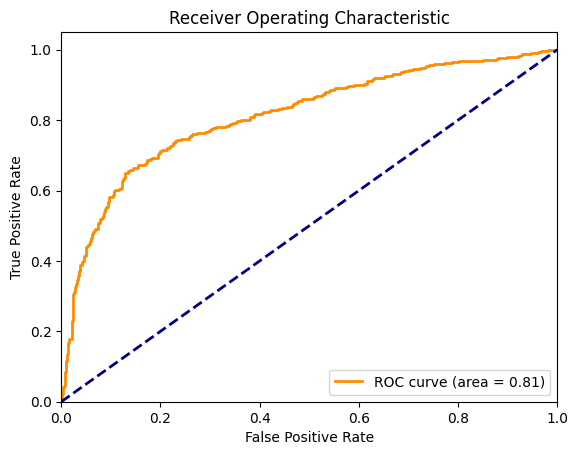

In [27]:
## After hyperparameter tuning we consider XGboost as best model

best_params = {'colsample_bytree': 0.8089447638179612,
 'gamma': 0.6720843364551687,
 'learning_rate': 0.11022479991037232,
 'max_depth': 4.0,
 'min_child_weight': 1.0,
 'n_estimators': 400.0,
 'subsample': 0.8308527633730072}

best_model_xgb = XGBClassifier(n_estimators=int(best_params['n_estimators']),
                           max_depth=int(best_params['max_depth']),
                           learning_rate=best_params['learning_rate'],
                           subsample=best_params['subsample'],
                           gamma=best_params['gamma'],
                           min_child_weight=int(best_params['min_child_weight']),
                           colsample_bytree=best_params['colsample_bytree'])

best_model_xgb.fit(X_train, y_train)
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print('Classification report')
print(classification_report(y_test, y_pred_test))

from sklearn.metrics import roc_curve, auc

y_prob = best_model_xgb.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

                        Feature  Importance
10  THROMBOCYTE_LEUCOCYTE_RATIO    0.136183
4                   THROMBOCYTE    0.132975
0                   HAEMATOCRIT    0.108967
9                           SEX    0.092424
1                  HAEMOGLOBINS    0.086183
8                           AGE    0.081189
2                   ERYTHROCYTE    0.080604
3                     LEUCOCYTE    0.077703
5                           MCH    0.071417
7                           MCV    0.067643
6                          MCHC    0.064711


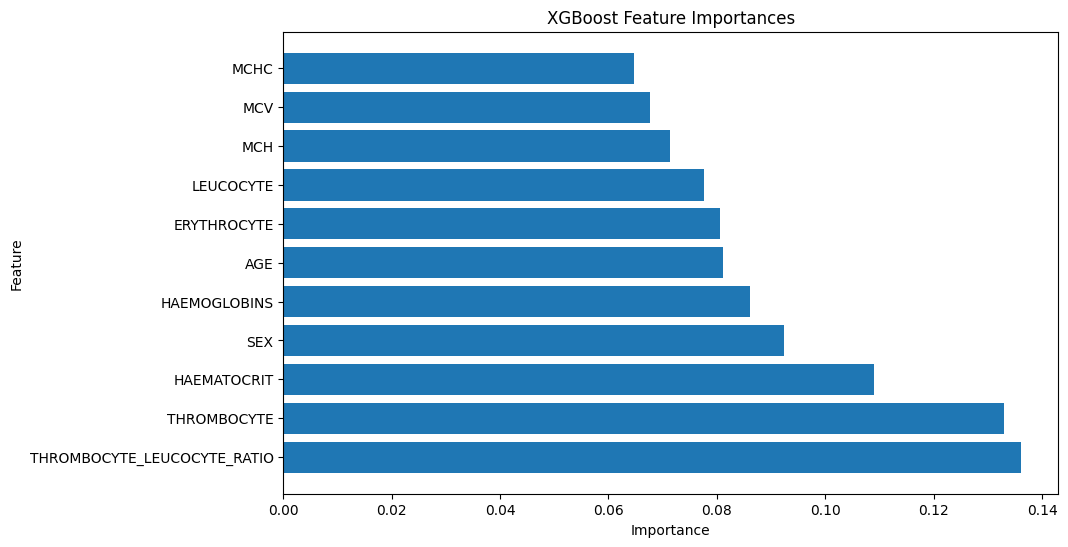

In [28]:
# Get feature importances

feature_importances = best_model_xgb.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importance_df)

# Plot feature importances
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importances')
plt.show()

## Pipeline to save final model

In [29]:

df = pd.read_csv('PATIENT DATASET.csv')  ## Loading the dataset

## Feature Engineering
df['THROMBOCYTE_LEUCOCYTE_RATIO'] = df['THROMBOCYTE'] / (df['LEUCOCYTE'] + 1e-6)

## separateing numeric columns for scaling
num_col = df.select_dtypes(include=['int64', 'float64'])
numeric_cols = num_col.columns

## Encoding
df['SEX'] = df['SEX'].map({'M': 1, 'F': 0})
df["SOURCE"] = df["SOURCE"].map({'in': 1, 'out': 0})

## Splitting the dataset
X = df.drop('SOURCE', axis = 1)  ## Independent variable
y = df['SOURCE']  ## Dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scaling the dataset
scaler = RobustScaler()

numeric_cols  ## Numeric columns

X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])  ## Fitting the scaler on training data and transforming it
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])  ## Transforming the test data using the same scaler

## Fitting the model on training data
## best model XGBoost
best_params = {'colsample_bytree': 0.8089447638179612,
 'gamma': 0.6720843364551687,
 'learning_rate': 0.11022479991037232,
 'max_depth': 4.0,
 'min_child_weight': 1.0,
 'n_estimators': 400.0,
 'subsample': 0.8308527633730072}

best_model_xgb = XGBClassifier(n_estimators=int(best_params['n_estimators']),
                           max_depth=int(best_params['max_depth']),
                           learning_rate=best_params['learning_rate'],
                           subsample=best_params['subsample'],
                           gamma=best_params['gamma'],
                           min_child_weight=int(best_params['min_child_weight']),
                           colsample_bytree=best_params['colsample_bytree'])

best_model_xgb.fit(X_train, y_train)
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)


# 'best_model_xgb' is our best trained XGBoost model

import joblib

filename = 'best_model_xgb.pkl' # model name
joblib.dump(best_model_xgb, filename) # saving the best model as best_model_xgb.pkl
print("Model saved successfully")


Model saved successfully
